## Important Note:

#### Please ensure that your dataset is formatted as a list of items, where each transaction is represented as a comma-separated values
For example:
- `olive oil, frozen smoothie, green tea, whole wheat flour, salmon`

Each transaction should be on a new line in the input file. 
<!-- This format is required for the FP-Growth and Apriori algorithms to function correctly. -->


In [8]:
# All Imports
import pandas as pd
import numpy as np

import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

### Reading the Dataset
To read your own dataset, you can modify the file path in the following code:

In [9]:
df = pd.read_csv("Example_Dataset.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre-Processing the Data

In [10]:
preprocessed_df = df.copy()

# Creating a new column which contains all the different items as a list
list_of_items_col = 'List of Items'
if list_of_items_col not in preprocessed_df.columns:
    preprocessed_df[list_of_items_col] = preprocessed_df.apply(lambda x: x.dropna().tolist(), axis = 1)

# Dropping all other columns
preprocessed_df = preprocessed_df[[list_of_items_col]]
# preprocessed_df


# Encoding 
transactions = preprocessed_df[list_of_items_col].tolist()
transaction_encode = TransactionEncoder()
transaction_encode.fit(transactions)

encoded_transactions = transaction_encode.transform(transactions)

preprocessed_df = pd.DataFrame(encoded_transactions, columns=transaction_encode.columns_)

The `preprocessed_df` DataFrame now contains the encoded transactions where each item is represented as a column header. Each row indicates the presence (True) or absence (False) of items in that specific transaction. 

For example, the structure will look like this:

| avocado | honey  | mineral water | frozen smoothie | eggs  | spinach | burgers |
|---------|--------|---------------|-----------------|-------|---------|---------|
| True    | False  | True          | False           | True  | False   | True    |
| False   | True   | False         | True            | False | True    | False   |


In [11]:
preprocessed_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Implementing Apriori Algorithm

### For More Information
Please refer to the README file for a comprehensive explanation of **support** and **confidence** metrics


## Inputting the Minimum Support Count

When prompted to enter the **Minimum Support Count**, please provide the value as a decimal rather than a percentage.

For example:
- Enter **0.01** for 1% support, not **1%** or **1**.

In [12]:
minimum_support_value = input("Input the Minimum Support Count: ")

frequent_items = apriori(preprocessed_df, min_support = float(minimum_support_value), use_colnames=True)
frequent_items

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


## Inputting the Confidence Threshold

When prompted to enter the **Confidence Threshold**, please provide the value as a decimal rather than a percentage. 

For example:
- Enter **0.75** for 75% confidence, not **75%** or **0.75**.

This ensures the application correctly interprets your input for accurate analysis.


In [13]:
confidence_threshold = input("Input the Confidence Threshold")

rules_df = association_rules(frequent_items, min_threshold = float(confidence_threshold))
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
5,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606


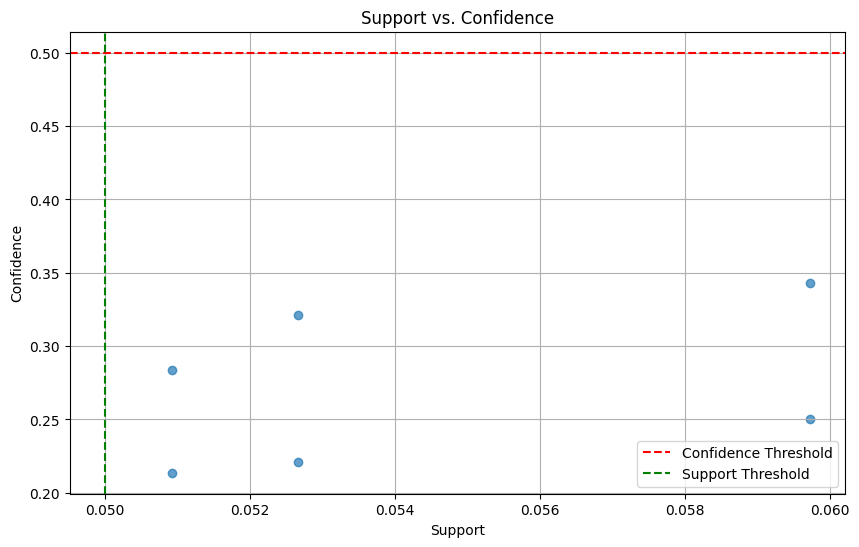